# AI Tool Evaluation in Education: Statistical Analysis
# 1. Introduction and Research Question
Research Question: How do university students' frequency of AI tool usage, perceived usefulness, and ethical perceptions influence their evaluation of AI as a helpful and legitimate study aid?

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

print("Libraries imported successfully")

Libraries imported successfully


# 2. Data Loading and Preparation

In [10]:
# Load dataset
df = pd.read_csv('survey_data.csv', sep='\t', encoding='utf-16')

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (77, 53)

First 5 rows:


,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,CO01,EP06_01,EP06_02,EP06_03,...,MAILSENT,LASTDATA,STATUS,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI
0,147,NaN,NaN,AIinEducation,interview,2025-08-13 20:59:10,1,4,3,4,...,NaN,2025-08-13 21:04:37,NaN,1,0,7,7,0,0,"1,03"
1,162,NaN,NaN,AIinEducation,interview,2025-08-14 16:32:12,1,4,1,5,...,NaN,2025-08-14 16:35:45,NaN,1,0,7,7,0,0,"1,58"
2,165,NaN,NaN,AIinEducation,interview,2025-08-14 16:33:57,1,1,1,2,...,NaN,2025-08-14 16:48:52,NaN,1,0,7,7,0,0,"0,65"
3,167,NaN,NaN,AIinEducation,interview,2025-08-14 16:34:46,1,3,4,4,...,NaN,2025-08-14 16:37:23,NaN,1,0,7,7,0,0,"1,83"
4,175,NaN,NaN,AIinEducation,interview,2025-08-14 16:49:20,1,1,1,5,...,NaN,2025-08-14 16:56:00,NaN,1,0,7,7,0,0,"1,04"



Column names:
['CASE', 'SERIAL', 'REF', 'QUESTNNR', 'MODE', 'STARTED', 'CO01', 'EP06_01', 'EP06_02', 'EP06_03', 'EP06_04', 'EP06_05', 'EP06_06', 'HL10_01', 'HL10_02', 'HL10_03', 'HL10_04', 'HL10_05', 'HL10_06', 'HL10_07', 'HL10_08', 'PU06_01', 'PU06_02', 'PU06_03', 'PU06_04', 'PU06_05', 'SD03', 'SD06', 'SD04', 'SD05', 'UF06_01', 'UF06_02', 'UF06_03', 'UF06_04', 'UF07', 'TIME001', 'TIME002', 'TIME003', 'TIME004', 'TIME005', 'TIME006', 'TIME007', 'TIME_SUM', 'MAILSENT', 'LASTDATA', 'STATUS', 'FINISHED', 'Q_VIEWER', 'LASTPAGE', 'MAXPAGE', 'MISSING', 'MISSREL', 'TIME_RSI']


# Data Cleaning and Preparation

In [12]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Remove rows with excessive missing values if necessary
# For this analysis, we'll focus on complete cases for our key variables
key_columns = ['EP06_01', 'EP06_02', 'EP06_03', 'EP06_04', 'EP06_05', 'EP06_06',
               'HL10_01', 'HL10_02', 'HL10_03', 'HL10_04', 'HL10_05', 'HL10_06', 'HL10_07', 'HL10_08',
               'PU06_01', 'PU06_02', 'PU06_03', 'PU06_04', 'PU06_05',
               'UF06_01', 'UF06_02', 'UF06_03', 'UF06_04']

df_clean = df.dropna(subset=key_columns)
print(f"Original data: {df.shape[0]} rows, Cleaned data: {df_clean.shape[0]} rows")

Missing values in each column:
CASE         0
SERIAL      77
REF         77
QUESTNNR     0
MODE         0
STARTED      0
CO01         0
EP06_01      0
EP06_02      0
EP06_03      0
EP06_04      0
EP06_05      0
EP06_06      0
HL10_01      0
HL10_02      0
HL10_03      0
HL10_04      0
HL10_05      0
HL10_06      0
HL10_07      0
HL10_08      0
PU06_01      0
PU06_02      0
PU06_03      0
PU06_04      0
PU06_05      0
SD03         0
SD06         0
SD04         0
SD05         0
UF06_01      0
UF06_02      0
UF06_03      0
UF06_04      0
UF07         0
TIME001      0
TIME002      0
TIME003      0
TIME004      0
TIME005      0
TIME006      0
TIME007      0
TIME_SUM     0
MAILSENT    77
LASTDATA     0
STATUS      77
FINISHED     0
Q_VIEWER     0
LASTPAGE     0
MAXPAGE      0
MISSING      0
MISSREL      0
TIME_RSI     0
dtype: int64
Original data: 77 rows, Cleaned data: 77 rows


# 3. Reverse Coding Implementation
Reverse coding ensures that higher scores always indicate more positive perceptions

In [14]:
# Apply reverse coding to negatively worded items
# Ethical scale: Reverse code items that represent negative perceptions
ethical_reverse_items = ['EP06_01', 'EP06_02', 'EP06_05', 'EP06_06']
for item in ethical_reverse_items:
    df_clean[f"{item}_reversed"] = 6 - df_clean[item]

# Helpfulness scale: Reverse code negative items
helpfulness_reverse_items = ['HL10_08']
for item in helpfulness_reverse_items:
    df_clean[f"{item}_reversed"] = 6 - df_clean[item]

print("Reverse coding completed")

Reverse coding completed


# 4. Composite Score Calculation
Creating reliable measures of each construct by averaging related items

In [16]:
# Create composite scores for each construct
# Ethical perceptions (using reverse-coded items where appropriate)
ethical_items = ['EP06_01_reversed', 'EP06_02_reversed', 'EP06_03', 'EP06_04', 'EP06_05_reversed', 'EP06_06_reversed']
df_clean['Ethical_Score'] = df_clean[ethical_items].mean(axis=1)

# Helpfulness evaluation (using reverse-coded items where appropriate)
helpfulness_items = ['HL10_01', 'HL10_02', 'HL10_03', 'HL10_04', 'HL10_05', 'HL10_06', 'HL10_07', 'HL10_08_reversed']
df_clean['Helpfulness_Score'] = df_clean[helpfulness_items].mean(axis=1)

# Perceived usefulness
usefulness_items = ['PU06_01', 'PU06_02', 'PU06_03', 'PU06_04', 'PU06_05']
df_clean['Usefulness_Score'] = df_clean[usefulness_items].mean(axis=1)

# Usage frequency
usage_items = ['UF06_01', 'UF06_02', 'UF06_03', 'UF06_04']
df_clean['Usage_Score'] = df_clean[usage_items].mean(axis=1)

print("Composite scores calculated successfully")

Composite scores calculated successfully


# 5. Reliability Analysis
Checking internal consistency of measurement scales using Cronbach's Alpha

In [18]:
# Function to calculate Cronbach's Alpha
def cronbach_alpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

# Calculate reliability for each scale
alpha_ethical = cronbach_alpha(df_clean[ethical_items].values)
alpha_helpfulness = cronbach_alpha(df_clean[helpfulness_items].values)
alpha_usefulness = cronbach_alpha(df_clean[usefulness_items].values)
alpha_usage = cronbach_alpha(df_clean[usage_items].values)

print("Scale Reliability (Cronbach's Alpha):")
print(f"Ethical Perceptions: α = {alpha_ethical:.4f}")
print(f"Helpfulness Evaluation: α = {alpha_helpfulness:.4f}")
print(f"Perceived Usefulness: α = {alpha_usefulness:.4f}")
print(f"Usage Frequency: α = {alpha_usage:.4f}")

Scale Reliability (Cronbach's Alpha):
Ethical Perceptions: α = 0.6538
Helpfulness Evaluation: α = 0.8007
Perceived Usefulness: α = 0.8565
Usage Frequency: α = 0.8415


# Enhanced Visual Distribution Analysis

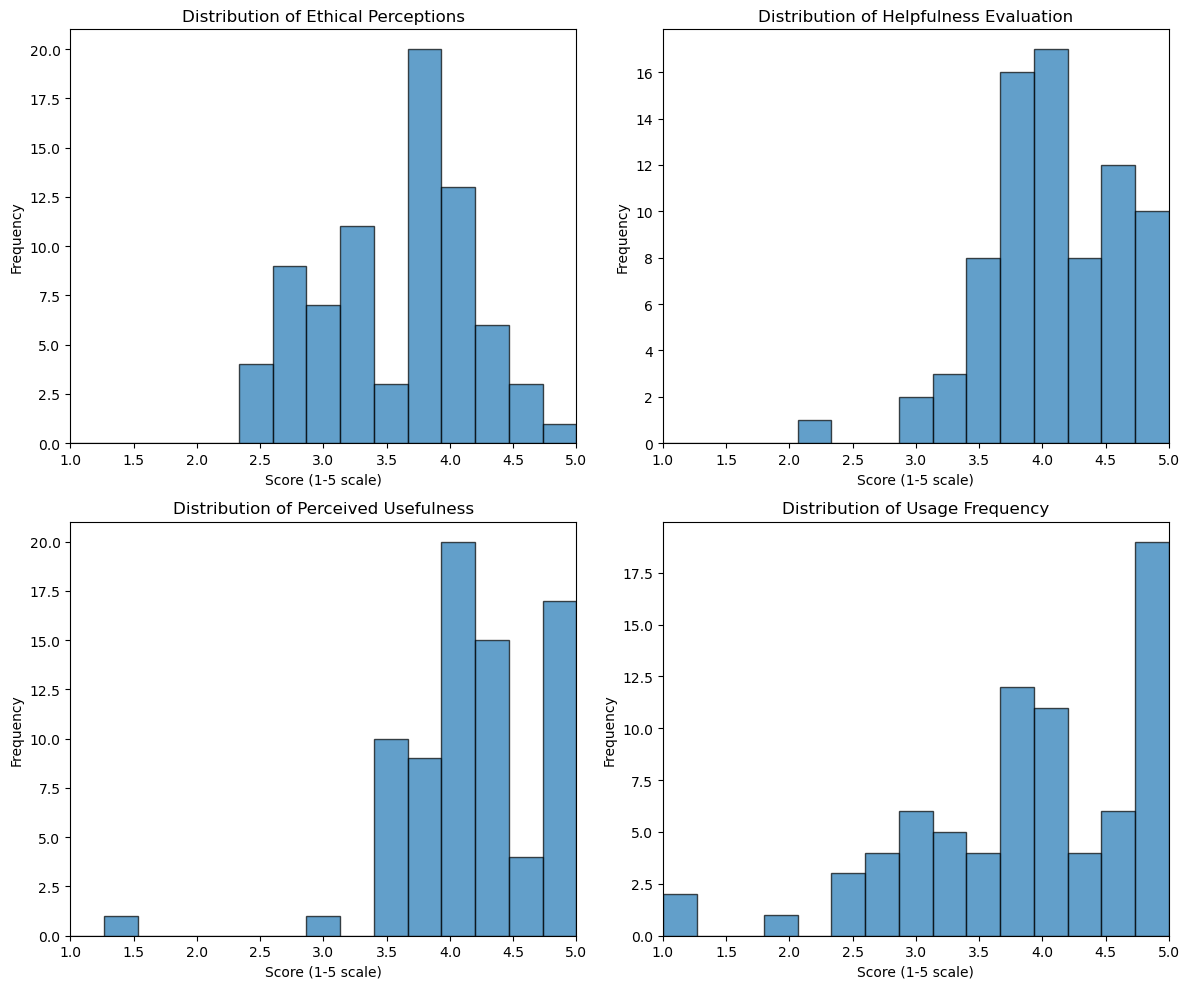

In [20]:
# Create visualizations of composite score distributions with consistent 1-5 scale
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Set consistent x-axis limits for all plots
x_limits = (1, 5)

# Ethical Score distribution
axes[0, 0].hist(df_clean['Ethical_Score'], bins=15, edgecolor='black', alpha=0.7, range=x_limits)
axes[0, 0].set_xlim(x_limits)
axes[0, 0].set_title('Distribution of Ethical Perceptions')
axes[0, 0].set_xlabel('Score (1-5 scale)')
axes[0, 0].set_ylabel('Frequency')

# Helpfulness Score distribution
axes[0, 1].hist(df_clean['Helpfulness_Score'], bins=15, edgecolor='black', alpha=0.7, range=x_limits)
axes[0, 1].set_xlim(x_limits)
axes[0, 1].set_title('Distribution of Helpfulness Evaluation')
axes[0, 1].set_xlabel('Score (1-5 scale)')
axes[0, 1].set_ylabel('Frequency')

# Usefulness Score distribution
axes[1, 0].hist(df_clean['Usefulness_Score'], bins=15, edgecolor='black', alpha=0.7, range=x_limits)
axes[1, 0].set_xlim(x_limits)
axes[1, 0].set_title('Distribution of Perceived Usefulness')
axes[1, 0].set_xlabel('Score (1-5 scale)')
axes[1, 0].set_ylabel('Frequency')

# Usage Score distribution
axes[1, 1].hist(df_clean['Usage_Score'], bins=15, edgecolor='black', alpha=0.7, range=x_limits)
axes[1, 1].set_xlim(x_limits)
axes[1, 1].set_title('Distribution of Usage Frequency')
axes[1, 1].set_xlabel('Score (1-5 scale)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('composite_score_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Descriptive Statistics
Understanding the distribution and properties of our variables

# 7. Correlation Analysis
Examining relationships between variables before regression

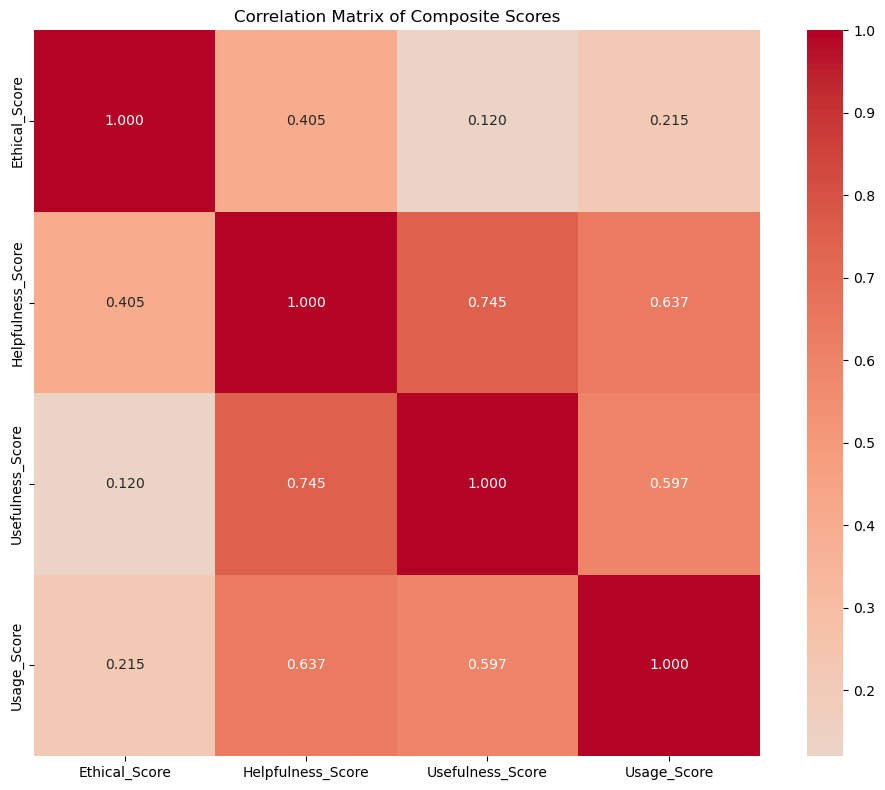

Correlation Analysis with Significance Testing:
Ethical_Score - Helpfulness_Score: r = 0.405, p = 0.0003 ***
Ethical_Score - Usefulness_Score: r = 0.120, p = 0.2978 
Ethical_Score - Usage_Score: r = 0.215, p = 0.0601 
Helpfulness_Score - Usefulness_Score: r = 0.745, p = 0.0000 ***
Helpfulness_Score - Usage_Score: r = 0.637, p = 0.0000 ***
Usefulness_Score - Usage_Score: r = 0.597, p = 0.0000 ***


In [23]:
# Calculate correlation matrix
composite_scores = ['Ethical_Score', 'Helpfulness_Score', 'Usefulness_Score', 'Usage_Score']
corr_matrix = df_clean[composite_scores].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.3f')
plt.title('Correlation Matrix of Composite Scores')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate and display correlation significance
print("Correlation Analysis with Significance Testing:")
print("="*50)
for i in range(len(composite_scores)):
    for j in range(i+1, len(composite_scores)):
        corr, p_value = pearsonr(df_clean[composite_scores[i]], df_clean[composite_scores[j]])
        sig_stars = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        print(f"{composite_scores[i]} - {composite_scores[j]}: r = {corr:.3f}, p = {p_value:.4f} {sig_stars}")

# 8. Multiple Regression Analysis
Testing how well predictors explain variance in helpfulness evaluation

In [25]:
# Prepare data for regression
X = df_clean[['Usage_Score', 'Usefulness_Score', 'Ethical_Score']]
y = df_clean['Helpfulness_Score']

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Display results
print("MULTIPLE REGRESSION RESULTS")
print("="*50)
print(model.summary())

MULTIPLE REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:      Helpfulness_Score   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     54.22
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           1.52e-18
Time:                        08:56:02   Log-Likelihood:                -12.101
No. Observations:                  77   AIC:                             32.20
Df Residuals:                      73   BIC:                             41.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const       

# 9. Regression Assumption Checking
Ensuring validity of regression results

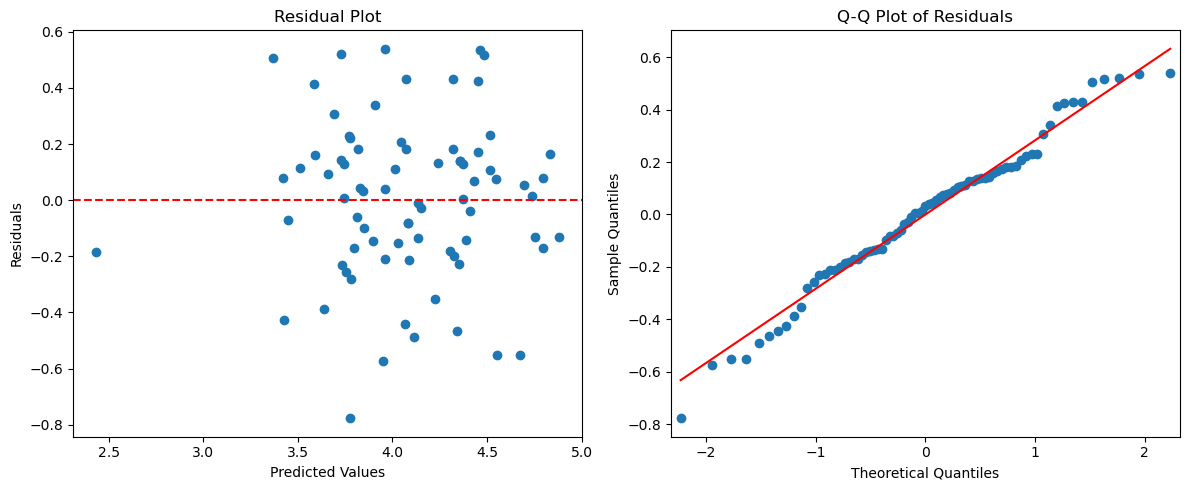

Variance Inflation Factors (VIF):
           Variable        VIF
0             const  76.886136
1       Usage_Score   1.607126
2  Usefulness_Score   1.555136
3     Ethical_Score   1.048698


In [27]:
# Check regression assumptions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Residual plot
axes[0].scatter(model.predict(), model.resid)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot')

# Q-Q plot of residuals
sm.qqplot(model.resid, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.savefig('regression_diagnostics.png', dpi=300, bbox_inches='tight')
plt.show()

# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factors (VIF):")
print(vif_data)

# Scater Plot with Regression Line

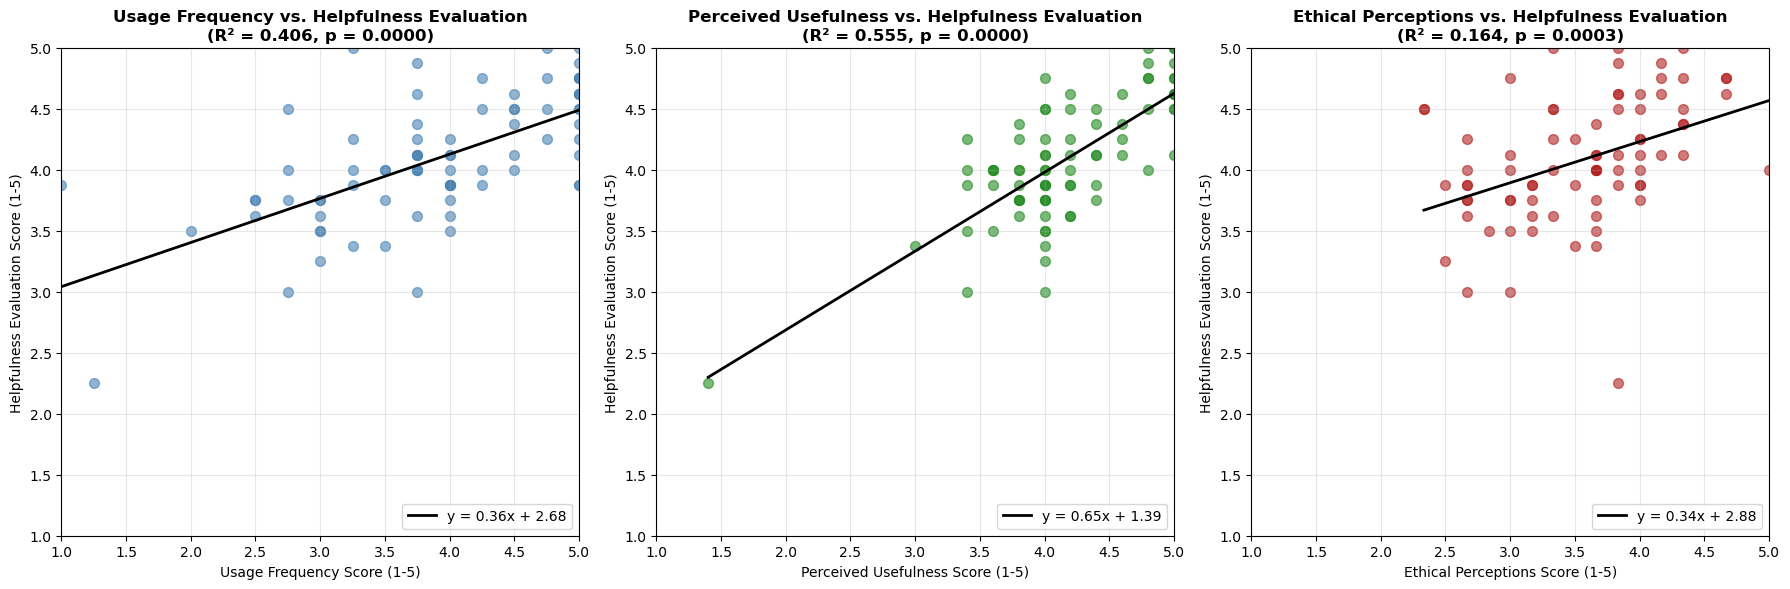

In [29]:
# Create scatterplots with linear regression lines for each predictor
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Predictor variables
predictors = ['Usage_Score', 'Usefulness_Score', 'Ethical_Score']
predictor_names = ['Usage Frequency', 'Perceived Usefulness', 'Ethical Perceptions']
colors = ['steelblue', 'forestgreen', 'firebrick']

# Create a scatterplot with linear regression line for each predictor
for i, (predictor, predictor_name, color) in enumerate(zip(predictors, predictor_names, colors)):
    # Fit simple linear regression model (not controlling for other variables)
    X_simple = sm.add_constant(df_clean[predictor])
    model_simple = sm.OLS(df_clean['Helpfulness_Score'], X_simple).fit()
    
    # Get regression parameters - FIXED: Use iloc for positional indexing
    intercept = model_simple.params.iloc[0]  # Use iloc instead of direct indexing
    slope = model_simple.params.iloc[1]      # Use iloc instead of direct indexing
    
    # Create scatterplot
    axes[i].scatter(df_clean[predictor], df_clean['Helpfulness_Score'], 
                   alpha=0.6, color=color, s=50)
    
    # Create regression line
    x_range = np.linspace(df_clean[predictor].min(), df_clean[predictor].max(), 100)
    y_pred = intercept + slope * x_range
    axes[i].plot(x_range, y_pred, color='black', linewidth=2, 
                label=f'y = {slope:.2f}x + {intercept:.2f}')
    
    # Calculate R² for simple regression
    r_squared_simple = model_simple.rsquared
    
    # Get p-value - FIXED: Use iloc for positional indexing
    p_value = model_simple.pvalues.iloc[1]  # Use iloc instead of direct indexing
    
    # Add title and labels
    axes[i].set_title(f'{predictor_name} vs. Helpfulness Evaluation\n(R² = {r_squared_simple:.3f}, p = {p_value:.4f})', 
                     fontweight='bold', fontsize=12)
    axes[i].set_xlabel(f'{predictor_name} Score (1-5)', fontsize=10)
    axes[i].set_ylabel('Helpfulness Evaluation Score (1-5)', fontsize=10)
    
    # Set consistent axis limits (1-5 scale)
    axes[i].set_xlim(1, 5)
    axes[i].set_ylim(1, 5)
    
    # Add grid for better readability
    axes[i].grid(alpha=0.3)
    
    # Add legend with regression equation
    axes[i].legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig('scatterplots_with_linear_regression.png', dpi=300, bbox_inches='tight')
plt.show()

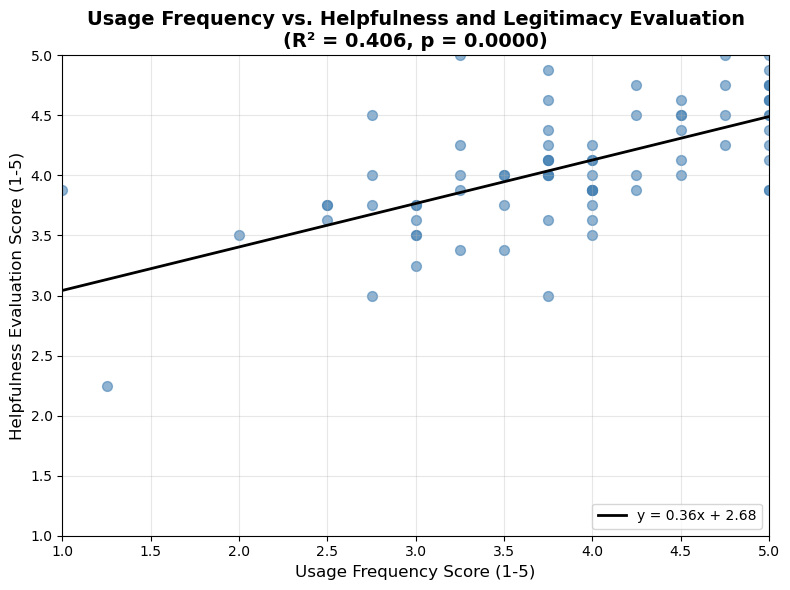

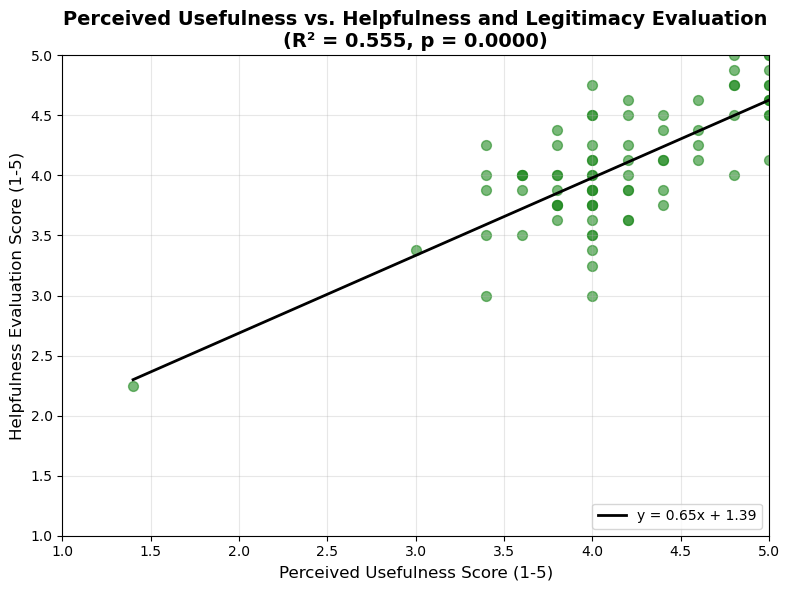

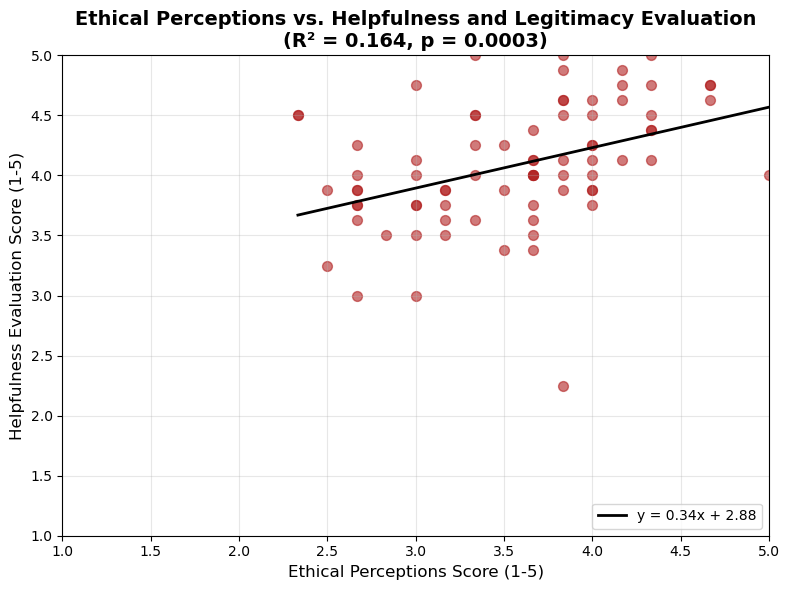

Three separate scatterplots have been created and saved:
1. scatter_Usage_Score.png
2. scatter_Usefulness_Score.png
3. scatter_Ethical_Score.png


In [56]:
# Predictor variables
predictors = ['Usage_Score', 'Usefulness_Score', 'Ethical_Score']
predictor_names = ['Usage Frequency', 'Perceived Usefulness', 'Ethical Perceptions']
colors = ['steelblue', 'forestgreen', 'firebrick']

# Create a separate scatterplot with linear regression line for each predictor
for i, (predictor, predictor_name, color) in enumerate(zip(predictors, predictor_names, colors)):
    # Create a new figure for each predictor
    plt.figure(figsize=(8, 6))
    
    # Fit simple linear regression model
    X_simple = sm.add_constant(df_clean[predictor])
    model_simple = sm.OLS(df_clean['Helpfulness_Score'], X_simple).fit()
    
    # Get regression parameters
    intercept = model_simple.params.iloc[0]
    slope = model_simple.params.iloc[1]
    
    # Create scatterplot
    plt.scatter(df_clean[predictor], df_clean['Helpfulness_Score'], 
                alpha=0.6, color=color, s=50)
    
    # Create regression line
    x_range = np.linspace(df_clean[predictor].min(), df_clean[predictor].max(), 100)
    y_pred = intercept + slope * x_range
    plt.plot(x_range, y_pred, color='black', linewidth=2, 
             label=f'y = {slope:.2f}x + {intercept:.2f}')
    
    # Calculate R² for simple regression
    r_squared_simple = model_simple.rsquared
    
    # Get p-value
    p_value = model_simple.pvalues.iloc[1]
    
    # Add title and labels
    plt.title(f'{predictor_name} vs. Helpfulness and Legitimacy Evaluation\n(R² = {r_squared_simple:.3f}, p = {p_value:.4f})', 
              fontweight='bold', fontsize=14)
    plt.xlabel(f'{predictor_name} Score (1-5)', fontsize=12)
    plt.ylabel('Helpfulness Evaluation Score (1-5)', fontsize=12)
    
    # Set consistent axis limits (1-5 scale)
    plt.xlim(1, 5)
    plt.ylim(1, 5)
    
    # Add grid for better readability
    plt.grid(alpha=0.3)
    
    # Add legend with regression equation
    plt.legend(loc='lower right', fontsize=10)
    
    # Save the individual plot
    plt.tight_layout()
    plt.savefig(f'scatter_{predictor}.png', dpi=300, bbox_inches='tight')
    plt.show()

print("Three separate scatterplots have been created and saved:")
print("1. scatter_Usage_Score.png")
print("2. scatter_Usefulness_Score.png")
print("3. scatter_Ethical_Score.png")

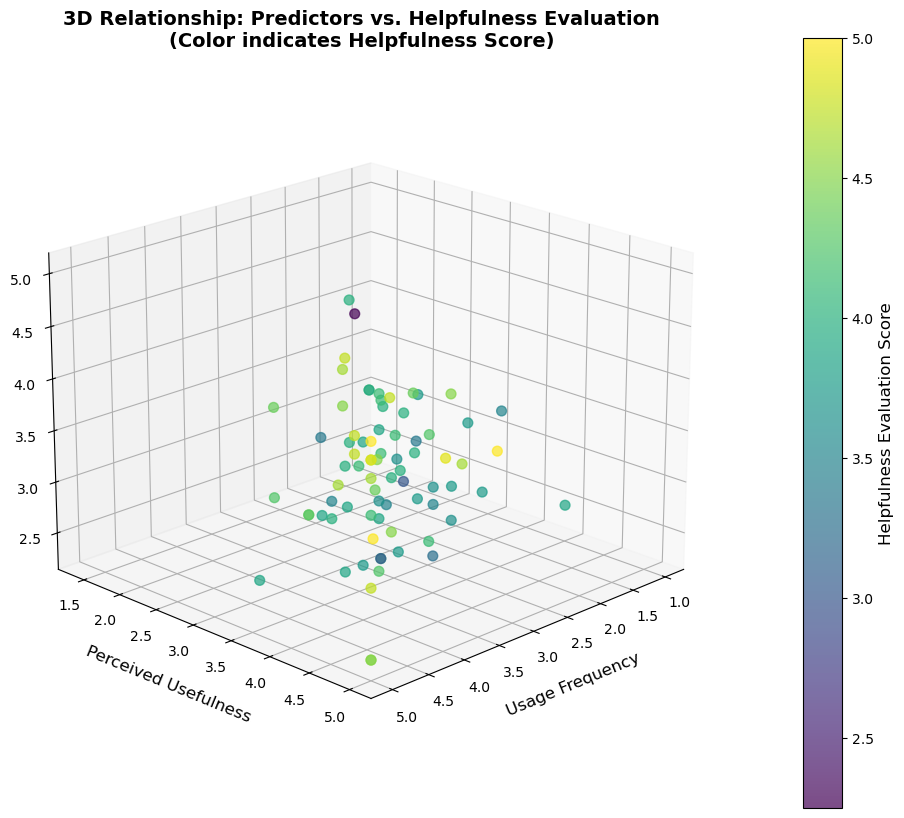

In [31]:
# Create a 3D scatterplot to visualize all three predictors simultaneously
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatterplot
scatter = ax.scatter(
    df_clean['Usage_Score'], 
    df_clean['Usefulness_Score'], 
    df_clean['Ethical_Score'], 
    c=df_clean['Helpfulness_Score'], 
    cmap='viridis', 
    s=50,
    alpha=0.7
)

# Add labels
ax.set_xlabel('Usage Frequency', fontsize=12, labelpad=10)
ax.set_ylabel('Perceived Usefulness', fontsize=12, labelpad=10)
ax.set_zlabel('Ethical Perceptions', fontsize=12, labelpad=10)
ax.set_title('3D Relationship: Predictors vs. Helpfulness Evaluation\n(Color indicates Helpfulness Score)', 
             fontweight='bold', fontsize=14, pad=20)

# Add colorbar
cbar = fig.colorbar(scatter, pad=0.1)
cbar.set_label('Helpfulness Evaluation Score', fontsize=12)

# Set viewing angle for better visibility
ax.view_init(elev=20, azim=45)

plt.savefig('3d_scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Path Diagram for Multiple Regression Model

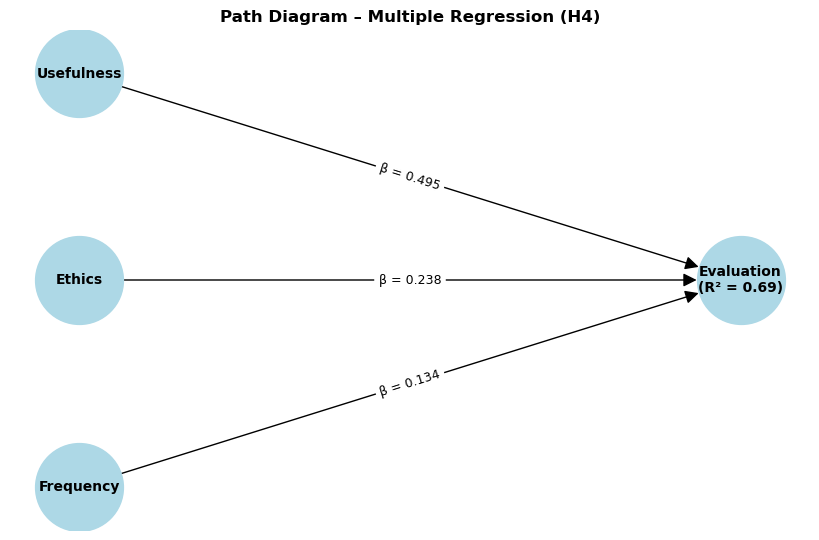

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

# --------------------------
# Values from your regression
# --------------------------
betas = {
    "Usefulness": 0.495,
    "Ethics": 0.238,
    "Frequency": 0.134
}
R2 = 0.690

# Create directed graph
G = nx.DiGraph()

# Add nodes
for var in betas.keys():
    G.add_node(var)
G.add_node(f"Evaluation\n(R² = {R2:.2f})")

# Add edges with beta weights
for var, beta in betas.items():
    G.add_edge(var, f"Evaluation\n(R² = {R2:.2f})", weight=beta)

# Manual layout (so it looks like a path diagram)
pos = {
    "Usefulness": (-1, 1),
    "Ethics": (-1, 0),
    "Frequency": (-1, -1),
    f"Evaluation\n(R² = {R2:.2f})": (1.5, 0)
}

# Draw the graph
plt.figure(figsize=(8, 5))
nx.draw(G, pos,
        with_labels=True,
        node_size=4000,
        node_color="lightblue",
        font_size=10,
        font_weight="bold",
        arrowsize=20)

# Add edge labels (β values)
edge_labels = {(u, v): f"β = {w:.3f}" for u, v, w in [(u, v, d["weight"]) for u, v, d in G.edges(data=True)]}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Path Diagram – Multiple Regression (H4)", fontsize=12, fontweight="bold")
plt.axis("off")

# Save the figure before showing
plt.savefig("path_diagram.png", dpi=300, bbox_inches="tight")

plt.show()


# Complete Code for Hypothesis Testing: Simple and Multiple Regression
You're absolutely right. For hypotheses H1, H2, and H3, you need simple linear regression (each predictor individually), and for H4, you need multiple linear regression (all predictors together). Here's the complete code:

In [35]:
# Define your variables
predictors = ['Usage_Score', 'Usefulness_Score', 'Ethical_Score']
predictor_names = ['Usage Frequency', 'Perceived Usefulness', 'Ethical Perceptions']
outcome = 'Helpfulness_Score'

# Store results for all hypotheses
results = []

print("HYPOTHESIS TESTING WITH LINEAR REGRESSION")
print("="*60)

# H1, H2, H3: Simple Linear Regression (individual predictors)
print("\nH1, H2, H3: SIMPLE LINEAR REGRESSION (Individual Predictors)")
print("-" * 50)

for i, predictor in enumerate(predictors):
    print(f"\nTesting H{i+1}: {predictor_names[i]} → Helpfulness Evaluation")
    print("-" * 40)
    
    # Prepare data for simple regression
    X = df_clean[[predictor]]
    y = df_clean[outcome]
    
    # Add constant for intercept
    X = sm.add_constant(X)
    
    # Fit simple regression model
    model = sm.OLS(y, X).fit()
    
    # Extract statistics - FIXED: Use iloc for positional indexing
    B = model.params.iloc[1]  # Unstandardized coefficient
    SE = model.bse.iloc[1]    # Standard error
    t = model.tvalues.iloc[1] # t-value
    p = model.pvalues.iloc[1] # p-value
    ci_lower, ci_upper = model.conf_int().iloc[1]  # 95% CI
    r_squared = model.rsquared  # R-squared
    
    # Calculate standardized coefficient (β)
    std_x = df_clean[predictor].std()
    std_y = df_clean[outcome].std()
    beta = B * (std_x / std_y)
    
    # Display results
    print(f"Unstandardized Coefficient (B): {B:.3f}")
    print(f"Standardized Coefficient (β): {beta:.3f}")
    print(f"Standard Error (SE): {SE:.3f}")
    print(f"t-value: {t:.3f}")
    print(f"p-value: {p:.3f}")
    print(f"95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")
    print(f"R²: {r_squared:.3f}")
    
    # Determine if hypothesis is supported
    if p < 0.05:
        print(f"✓ H{i+1} SUPPORTED: Significant relationship found")
        if B > 0:
            print(f"  Positive relationship: Higher {predictor_names[i].lower()} predicts higher helpfulness evaluation")
        else:
            print(f"  Negative relationship: Higher {predictor_names[i].lower()} predicts lower helpfulness evaluation")
    else:
        print(f"✗ H{i+1} NOT SUPPORTED: No significant relationship found")
    
    # Store results
    results.append({
        'Hypothesis': f'H{i+1}',
        'Predictor': predictor_names[i],
        'B': B,
        'β': beta,
        'SE': SE,
        't': t,
        'p': p,
        'CI Lower': ci_lower,
        'CI Upper': ci_upper,
        'R²': r_squared,
        'Supported': p < 0.05
    })

# H4: Multiple Linear Regression (all predictors together)
print("\n\nH4: MULTIPLE LINEAR REGRESSION (Combined Effect)")
print("-" * 50)
print("Testing if all predictors together significantly explain variance in helpfulness evaluation")

# Prepare data for multiple regression
X = df_clean[predictors]
y = df_clean[outcome]

# Add constant for intercept
X = sm.add_constant(X)

# Fit multiple regression model
model = sm.OLS(y, X).fit()

# Extract overall model statistics
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj
f_statistic = model.fvalue
f_pvalue = model.f_pvalue

# Display results
print(f"R²: {r_squared:.3f}")
print(f"Adjusted R²: {adj_r_squared:.3f}")
print(f"F-statistic: {f_statistic:.3f}")
print(f"F p-value: {f_pvalue:.3f}")

# Determine if H4 is supported
if f_pvalue < 0.05:
    print("✓ H4 SUPPORTED: Predictors together significantly explain variance in helpfulness evaluation")
    print(f"  The model explains {r_squared*100:.1f}% of the variance")
else:
    print("✗ H4 NOT SUPPORTED: Predictors together do not significantly explain variance")

# Extract individual predictor statistics from multiple regression
print("\nIndividual Predictors in Multiple Regression Model:")
print("-" * 50)
for i, predictor in enumerate(predictors):
    B = model.params[predictor]
    SE = model.bse[predictor]
    t = model.tvalues[predictor]
    p = model.pvalues[predictor]
    ci_lower, ci_upper = model.conf_int().loc[predictor]
    
    # Calculate standardized coefficient (β)
    std_x = df_clean[predictor].std()
    std_y = df_clean[outcome].std()
    beta = B * (std_x / std_y)
    
    print(f"\n{predictor_names[i]}:")
    print(f"  B: {B:.3f}, SE: {SE:.3f}, t: {t:.3f}, p: {p:.3f}")
    print(f"  95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")
    print(f"  β: {beta:.3f}")

# Store H4 results
results.append({
    'Hypothesis': 'H4',
    'Predictor': 'All Combined',
    'B': np.nan,
    'β': np.nan,
    'SE': np.nan,
    't': np.nan,
    'p': f_pvalue,
    'CI Lower': np.nan,
    'CI Upper': np.nan,
    'R²': r_squared,
    'Supported': f_pvalue < 0.05
})

# Create comprehensive results table
results_df = pd.DataFrame(results)
print("\n\nCOMPREHENSIVE HYPOTHESIS TESTING RESULTS")
print("="*80)
print(results_df.round(4))

HYPOTHESIS TESTING WITH LINEAR REGRESSION

H1, H2, H3: SIMPLE LINEAR REGRESSION (Individual Predictors)
--------------------------------------------------

Testing H1: Usage Frequency → Helpfulness Evaluation
----------------------------------------
Unstandardized Coefficient (B): 0.362
Standardized Coefficient (β): 0.637
Standard Error (SE): 0.051
t-value: 7.164
p-value: 0.000
95% CI: [0.261, 0.463]
R²: 0.406
✓ H1 SUPPORTED: Significant relationship found
  Positive relationship: Higher usage frequency predicts higher helpfulness evaluation

Testing H2: Perceived Usefulness → Helpfulness Evaluation
----------------------------------------
Unstandardized Coefficient (B): 0.647
Standardized Coefficient (β): 0.745
Standard Error (SE): 0.067
t-value: 9.667
p-value: 0.000
95% CI: [0.513, 0.780]
R²: 0.555
✓ H2 SUPPORTED: Significant relationship found
  Positive relationship: Higher perceived usefulness predicts higher helpfulness evaluation

Testing H3: Ethical Perceptions → Helpfulness Ev